**Importing necessary libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation

**We load the dataset on Jobs in data**

In [2]:
a= pd.read_csv("/kaggle/input/jobs-in-data/jobs_in_data.csv")
a

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


**Displaying the first 5 rows of the dataset to understand the data better.**

In [3]:
a.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


**Basic information about the dataset**

In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


**Statistical description**

In [5]:
a.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


# Data Cleaning

**Checking for null values in the dataset**

In [6]:
mask1= a.isnull().sum()
mask1

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

**Checking for the unique values and then changing the datatype so that the memory usage is optimal**

In [7]:
a["work_setting"].unique()

array(['Hybrid', 'In-person', 'Remote'], dtype=object)

In [8]:
a["salary_currency"].unique()

array(['EUR', 'USD', 'GBP', 'CAD', 'AUD', 'PLN', 'BRL', 'TRY', 'CHF',
       'SGD', 'DKK'], dtype=object)

In [9]:
a["experience_level"].unique()

array(['Mid-level', 'Senior', 'Executive', 'Entry-level'], dtype=object)

In [10]:
a["employment_type"].unique()

array(['Full-time', 'Part-time', 'Contract', 'Freelance'], dtype=object)

In [11]:
a["company_size"].unique()

array(['L', 'M', 'S'], dtype=object)

In [12]:
a["work_setting"]= a["work_setting"].astype("category")
a["salary_currency"]= a["salary_currency"].astype("category")
a["experience_level"]= a["experience_level"].astype("category")
a["employment_type"]= a["employment_type"].astype("category")
a["company_size"]= a["company_size"].astype("category")

In [13]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           9355 non-null   int64   
 1   job_title           9355 non-null   object  
 2   job_category        9355 non-null   object  
 3   salary_currency     9355 non-null   category
 4   salary              9355 non-null   int64   
 5   salary_in_usd       9355 non-null   int64   
 6   employee_residence  9355 non-null   object  
 7   experience_level    9355 non-null   category
 8   employment_type     9355 non-null   category
 9   work_setting        9355 non-null   category
 10  company_location    9355 non-null   object  
 11  company_size        9355 non-null   category
dtypes: category(5), int64(3), object(4)
memory usage: 558.4+ KB


In [14]:
a.sort_values(by= "work_year", ascending= False)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
4976,2023,Research Scientist,Data Science and Research,USD,280000,280000,United Kingdom,Mid-level,Full-time,Hybrid,United Kingdom,L
4988,2023,Machine Learning Engineer,Machine Learning and AI,USD,142200,142200,United States,Senior,Full-time,In-person,United States,M
4987,2023,Machine Learning Engineer,Machine Learning and AI,USD,204500,204500,United States,Senior,Full-time,In-person,United States,M
4986,2023,Applied Scientist,Data Science and Research,USD,136000,136000,United States,Senior,Full-time,In-person,United States,L
...,...,...,...,...,...,...,...,...,...,...,...,...
9149,2020,Big Data Engineer,Data Engineering,USD,70000,70000,United States,Entry-level,Full-time,Remote,United States,L
9152,2020,Data Scientist,Data Science and Research,EUR,60000,68428,Greece,Senior,Full-time,Remote,United States,L
9255,2020,Data Analyst,Data Analysis,USD,72000,72000,United States,Entry-level,Full-time,Remote,United States,L
9157,2020,Research Scientist,Data Science and Research,USD,450000,450000,United States,Mid-level,Full-time,In-person,United States,M


# About the dataset

**Average salary (USD) wrt the employment type**

In [15]:
d1= a.groupby("employment_type")["salary_in_usd"].mean().sort_values(ascending=False)
d1

employment_type
Full-time    150630.092052
Contract     117109.368421
Part-time     57866.066667
Freelance     53868.636364
Name: salary_in_usd, dtype: float64

**Count of jobs wrt work setting**

In [16]:
w= a["work_setting"].value_counts()
w

work_setting
In-person    5730
Remote       3434
Hybrid        191
Name: count, dtype: int64

# 1. Distribution of Salary (USD)

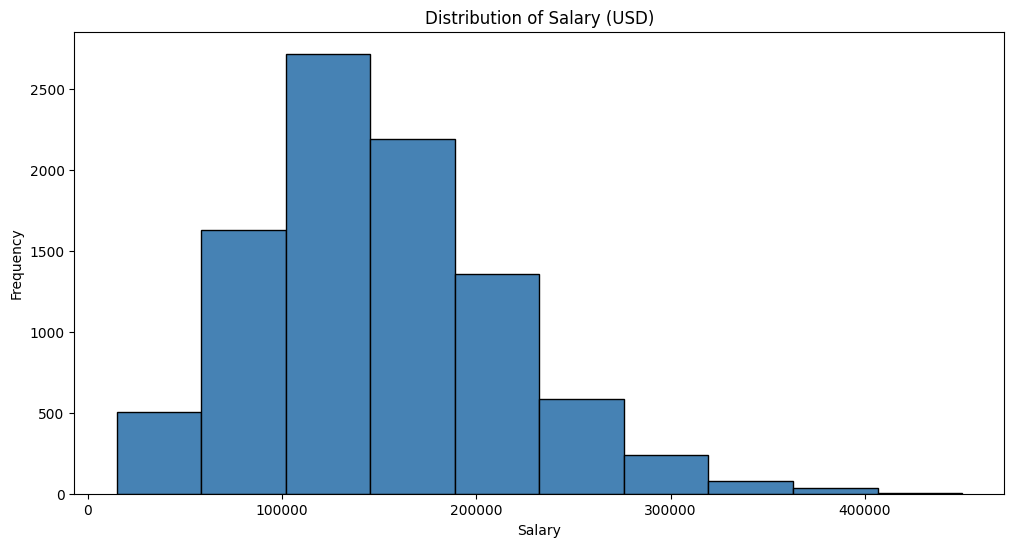

In [17]:
plt.figure(figsize=(12, 6))
plt.hist(a["salary_in_usd"], color= "steelblue", edgecolor="black")
plt.title("Distribution of Salary (USD)")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

Findings in (1):
* The distribution of salaries is fairly even, with a slight positive skew. This means there are more people earning salaries closer to the average than there are people earning very high or very low salaries.
* The Salary is mostly between USD 100000 and USD 200000, the mean being around USD 150000
* The frequency for salary above USD 300000 is low

# 2. Experience Level of employees

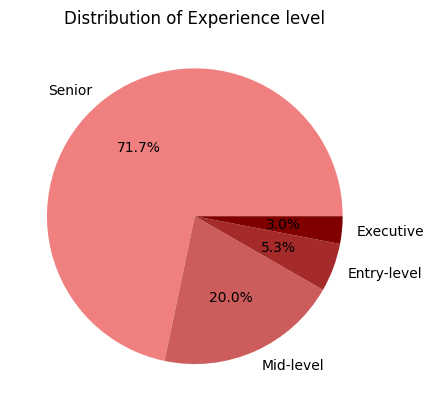

In [18]:
e= a["experience_level"].value_counts()
plt.pie(e, autopct='%.1f%%', labels= e.index, colors= ["lightcoral","indianred","brown","maroon"])
plt.title("Distribution of Experience level")
plt.show()

Findings in (2):
* Senior-level employees make up the largest portion of the workforce at 71.7%.
* Executives comprise 5.3% of the workforce. This is a relatively small percentage.
* Entry-level employees account for 20.0% of the workforce. This is a notable presence of new hires, potentially indicating recent growth or a focus on bringing in fresh talent.
* Mid-level employees make up the smallest portion at 3.0%. This suggests a limited number of employees in middle management positions

# 3. Job Count by Category

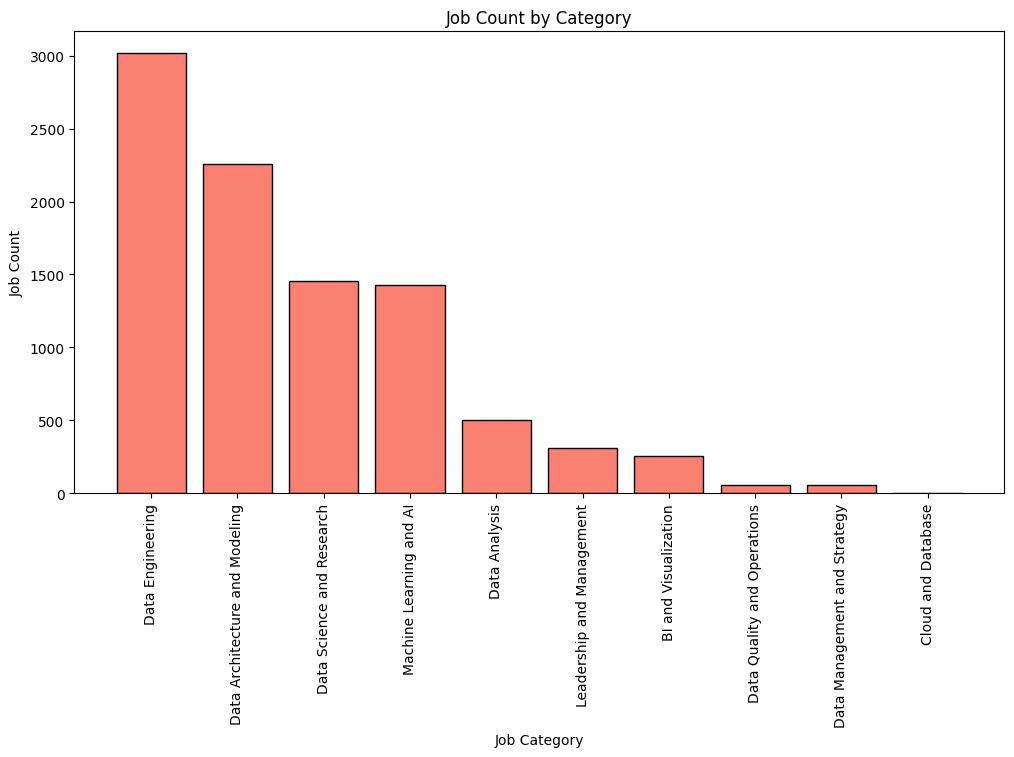

In [19]:
lc= a["job_category"].value_counts()
lu= a["job_category"].unique()

plt.figure(figsize=(12, 6))
plt.bar(lu,lc, color= "salmon", edgecolor="black")
plt.title("Job Count by Category")
plt.xlabel("Job Category")
plt.ylabel("Job Count")
plt.xticks(rotation=90)
plt.show()

Findings in (3):
* The graph shows a varied distribution of job counts across different categories. This suggests that there is not a single dominant job category, but rather a mix of different roles.
* Data Engineering is the most common job cateogory, with nearly 3000 job postings. 

# 4. Average Salary by Company Size

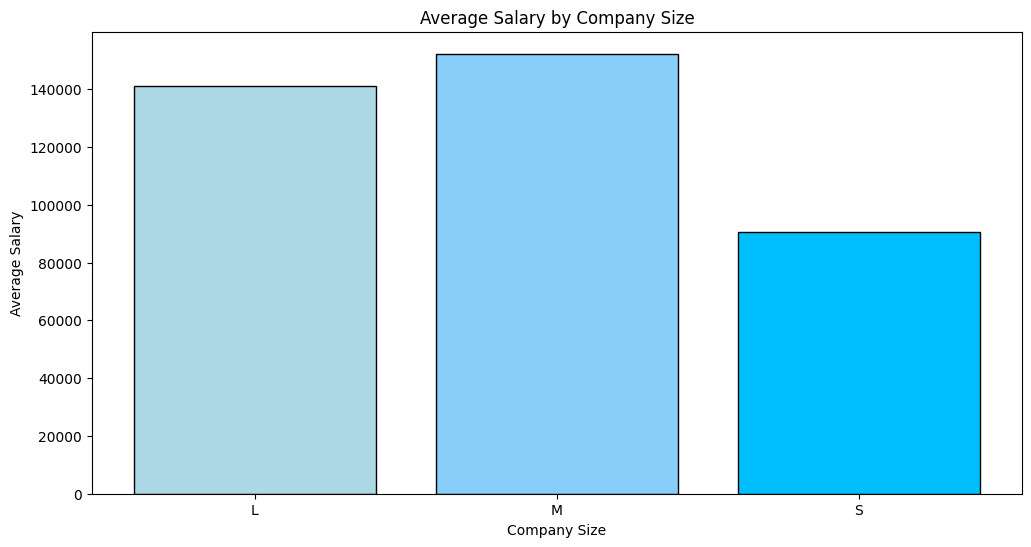

In [20]:
avg_s= a.groupby("company_size")["salary_in_usd"].mean()
p= a["company_size"].unique()

plt.figure(figsize=(12, 6))
plt.bar(p, avg_s, color= ["lightblue","lightskyblue","deepskyblue"], edgecolor="black")
plt.title("Average Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Average Salary")
plt.show()

Findings in (4):
* The average salary increases steadily as company size increases, with the biggest jump occurring between small and medium-sized companies.
* A medium sized company has the highest average salary but this may also be because of high income range in larger companies

# 5. Relationship between Experience and Salary

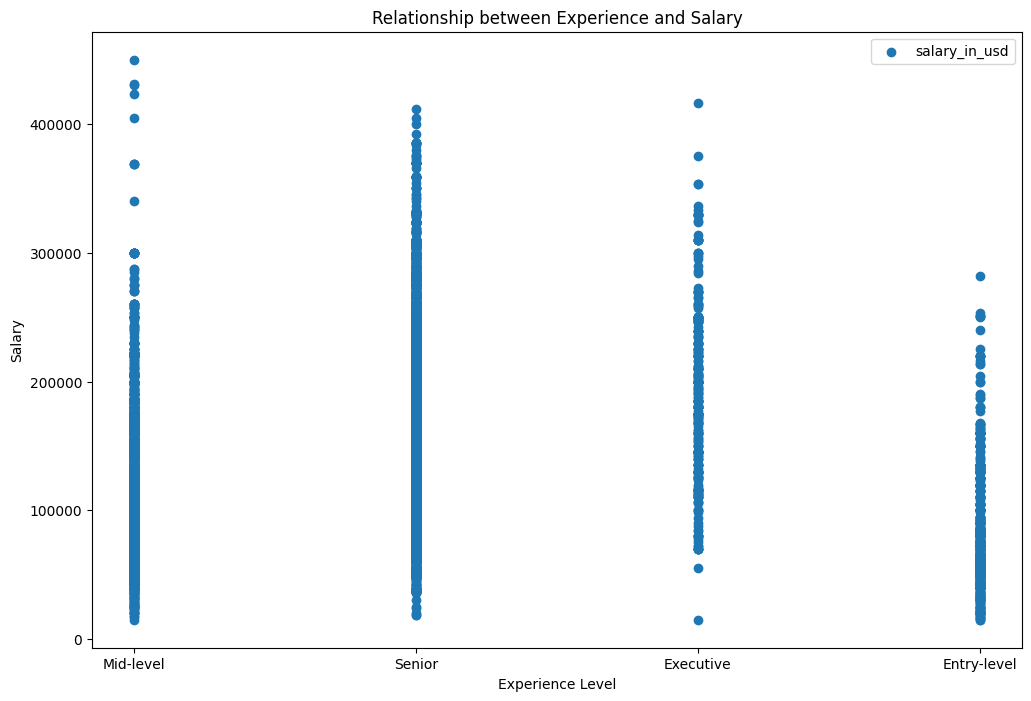

In [21]:
plt.figure(figsize=(12, 8))
plt.scatter(x="experience_level", y="salary_in_usd", data=a)
plt.title("Relationship between Experience and Salary")
plt.xlabel("Experience Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

Findings in (5):
* There is a positive correlation between experience level and salary. This means that, on average, workers with more experience tend to earn more than workers with less experience.

# Conclusion
The analysis of the "Jobs in Data" dataset provides insights into the job categories and salaries along with the location and company size. After cleaning the data and describing the data briefly, we have done detailed analysis on:
1. Distribution of Salary (USD)
2. Experience Level of employees
3. Job Count by Category
4. Average Salary by Company Size
5. Relationship between Experience and Salary